# Analytics of the Bugcrowd programs

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import io 
import numpy as np

In [97]:
# df_old = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")
df = pd.read_excel("../used_data/data-one-hot.xlsx")

## Data cleaning 


In [98]:
df.dtypes

Unnamed: 0                                  int64
Reward Range                               object
Link                                       object
Title                                      object
Short Description                          object
Is Safe Harbor                             object
Vulnearbilities Rewarded                  float64
Validation Within                          object
Average Payout                             object
Hall of Famers                             object
Number People                              object
P4                                         object
P3                                         object
P2                                         object
P1                                         object
Maximum Reword                             object
programm_ruels                             object
annocument_count                          float64
Featured                                   object
Industry                                   object


In [99]:
df.columns

Index(['Unnamed: 0', 'Reward Range', 'Link', 'Title', 'Short Description',
       'Is Safe Harbor', 'Vulnearbilities Rewarded', 'Validation Within',
       'Average Payout', 'Hall of Famers', 'Number People', 'P4', 'P3', 'P2',
       'P1', 'Maximum Reword', 'programm_ruels', 'annocument_count',
       'Featured', 'Industry', 'Technology', 'Technology API Target',
       'Technology Web Targets', 'Technology Android Targets',
       'Technology IoT Targets', 'Technology iOS Targets',
       'Technology Hardware Targets', 'Featured Staff Picks',
       'Featured BCTeamHunt2022', 'Featured New Scope & Increased Rewards',
       'Featured Self Service', 'Featured Highest Reward Range',
       'Featured Coordinated Disclosure', 'Featured Atlassian',
       'Featured Needs a P1 warrior', 'Has Technology', 'Has Featured',
       'Has Industry'],
      dtype='object')

In [100]:
df["Is Safe Harbor"] = df["Is Safe Harbor"].astype('category')

In [101]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     Reward Range  \
0             0    $100 - $6,500   
1             1   $300 - $30,000   
2             2              NaN   
3             3              NaN   
4             4    $250 - $5,000   
..          ...              ...   
324         324  Points – $1,250   
325         325              NaN   
326         326              NaN   
327         327    $150 – $2,500   
328         328              NaN   

                                                  Link  \
0    https://bugcrowd.com/programs/teasers/9ivBQDeA...   
1                       https://bugcrowd.com/agilebits   
2                         https://bugcrowd.com/anz-vdp   
3                     https://bugcrowd.com/amexgbt-vdp   
4                   https://bugcrowd.com/twentyminuten   
..                                                 ...   
324          https://bugcrowd.com/macquarie-group-vdp    
325                    https://bugcrowd.com/comcastvdp   
326        

In [102]:
df['Reward Range'] = df['Reward Range'].str.replace('$', '').str.replace('Points', '0')
df['Reward Range'] = df['Reward Range'].fillna(0)


/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_82363/2298797878.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Reward Range'] = df['Reward Range'].str.replace('$', '').str.replace('Points', '0')


In [103]:
for i in df["Reward Range"]:
    print(i)

100 - 6,500
300 - 30,000
0
0
250 - 5,000
0 - 2,500
200 - 3,500
0 - 5,000
100 - 1,500
100 - 7,000
0
0
100 - 6,000
0
0
250 - 2,500
300 - 6,500
100 - 1,500
200 - 10,000
100 - 3,000
200 - 4,500
150 - 10,000
50 - 2,500
150 - 4,000
500 - 20,000
50 - 2,500
50 - 10,000
200 - 10,000
0
100 - 15,000
200 - 5,000
100 - 1,500
0
0 - 2,000
0
0 - 4,500
150 - 2,500
100 - 4,500
300 - 10,000
200 - 25,000
200 - 12,000
0
0
0
100 - 5,000
150 - 5,000
100 - 10,000
150 - 8,000
0
200 - 4,500
250 - 10,000
100 - 10,000
0 - 2,100
0 - 2,500
200 - 6,500
200 - 4,500
0 - 4,000
50 - 4,000
0 - 2,500
100 - 5,000
200 - 10,000
200 - 4,500
0
0 - 2,000
150 - 10,000
0
0
100 - 1,500
100 - 5,000
75 - 1,250
0
50 - 2,500
200 - 5,000
0
0
0
0
300 - 10,000
0
0
150 - 2,500
75 - 1,250
0
250 - 3,000
100 - 5,000
0
100 - 2,250
100 - 10,000
0
200 - 12,000
0 - 4,000
0
100 - 10,000
150 - 2,500
0 - 100,000
0
0
0
100 - 6,000
150 - 2,500
25 - 600
0
200 - 6,000
100 - 3,500
0
150 - 5,000
150 - 4,000
150 - 2,500
0
0
0
0
200 - 4,000
0
0 - 4,500
0
0

In [104]:
df["Reward Range"] = df["Reward Range"].astype(str)

In [105]:
def avg_range(r):
    if r == '0':
        return None
    if ' – ' in r:
        r = r.replace(' – ','-')
    min_max = r.split("-")
    min_value = int(min_max[0].replace(",",""))
    max_value = int(min_max[1].replace(",",""))
    return (min_value + max_value) / 2


In [106]:
df['Reward Range Average'] = df['Reward Range'].apply(avg_range)


In [107]:
df['Reward Range Average']

0       3300.0
1      15150.0
2          NaN
3          NaN
4       2625.0
        ...   
324      625.0
325        NaN
326        NaN
327     1325.0
328        NaN
Name: Reward Range Average, Length: 329, dtype: float64

In [108]:
df["Reward Range Average"].fillna(0, inplace = True)

In [109]:
# Apply the to_hours() function to the "Validation Within" column
df["Validation Within"].apply(lambda x: str(x))
df["Validation Within"] = df["Validation Within"].fillna(value="N/A")
df["Validation Within"].apply(lambda x: str(x))

0         N/A
1      6 days
2      8 days
3         N/A
4      5 days
        ...  
324    3 days
325    5 days
326     1 day
327       N/A
328       N/A
Name: Validation Within, Length: 329, dtype: object

In [110]:
df["Validation Within"] = df["Validation Within"].astype(str)
df["Validation Within"] = df["Validation Within"].apply(lambda x: str(x))

In [111]:
df["Validation Within"]

0         N/A
1      6 days
2      8 days
3         N/A
4      5 days
        ...  
324    3 days
325    5 days
326     1 day
327       N/A
328       N/A
Name: Validation Within, Length: 329, dtype: object

In [112]:
print(df["Validation Within"].unique())

['N/A' '6 days' '8 days' '5 days' '3 days' '4 days' 'about 21 hours'
 '22 days' '11 days' '20 days' '1 days' '12 days' '1 day' '2 day'
 '27 days' '2 days' '14 days' 'about 1 month' 'about 12 hours' '7 days'
 'about 2 months' 'about 2 hours' '15 days' 'about 7 hours'
 'about 18 hours' '17 days' '2 months' 'about 13 hours' '9 days' '28 days'
 'about 6 hours' '18 days' 'about 23 hours' '16 days' '19 days' '25 days'
 'about 20 hours' 'about 11 hours' '10 days' 'about 9 hours'
 'about 4 hours' 'about 16 hours' 'about 19 hours' 'about 22 hours']


In [113]:
df["Validation Within"] = df["Validation Within"].replace(["1 days", "2 day", "2 months"], ["1 day", "2 days", "60 days"])


In [114]:
df["Validation Within"].unique()

array(['N/A', '6 days', '8 days', '5 days', '3 days', '4 days',
       'about 21 hours', '22 days', '11 days', '20 days', '1 day',
       '12 days', '2 days', '27 days', '14 days', 'about 1 month',
       'about 12 hours', '7 days', 'about 2 months', 'about 2 hours',
       '15 days', 'about 7 hours', 'about 18 hours', '17 days', '60 days',
       'about 13 hours', '9 days', '28 days', 'about 6 hours', '18 days',
       'about 23 hours', '16 days', '19 days', '25 days',
       'about 20 hours', 'about 11 hours', '10 days', 'about 9 hours',
       'about 4 hours', 'about 16 hours', 'about 19 hours',
       'about 22 hours'], dtype=object)

In [115]:
df["Validation Within"] = df["Validation Within"].str.replace("about ","")



In [116]:
df["Validation Within"].unique()

array(['N/A', '6 days', '8 days', '5 days', '3 days', '4 days',
       '21 hours', '22 days', '11 days', '20 days', '1 day', '12 days',
       '2 days', '27 days', '14 days', '1 month', '12 hours', '7 days',
       '2 months', '2 hours', '15 days', '7 hours', '18 hours', '17 days',
       '60 days', '13 hours', '9 days', '28 days', '6 hours', '18 days',
       '23 hours', '16 days', '19 days', '25 days', '20 hours',
       '11 hours', '10 days', '9 hours', '4 hours', '16 hours',
       '19 hours', '22 hours'], dtype=object)

In [117]:
df["Validation Within"] = df["Validation Within"].str.replace("1 month","30 days")
df["Validation Within"] = df["Validation Within"].str.replace("2 months","60 days")

In [118]:
df["Validation Within"].unique()

array(['N/A', '6 days', '8 days', '5 days', '3 days', '4 days',
       '21 hours', '22 days', '11 days', '20 days', '1 day', '12 days',
       '2 days', '27 days', '14 days', '30 days', '12 hours', '7 days',
       '60 days', '2 hours', '15 days', '7 hours', '18 hours', '17 days',
       '13 hours', '9 days', '28 days', '6 hours', '18 days', '23 hours',
       '16 days', '19 days', '25 days', '20 hours', '11 hours', '10 days',
       '9 hours', '4 hours', '16 hours', '19 hours', '22 hours'],
      dtype=object)

In [119]:
df["Validation Within Hours"] = df["Validation Within"].str.extract('(\d+)', expand=False).astype(float)*24


In [120]:
df.dtypes

Unnamed: 0                                   int64
Reward Range                                object
Link                                        object
Title                                       object
Short Description                           object
Is Safe Harbor                            category
Vulnearbilities Rewarded                   float64
Validation Within                           object
Average Payout                              object
Hall of Famers                              object
Number People                               object
P4                                          object
P3                                          object
P2                                          object
P1                                          object
Maximum Reword                              object
programm_ruels                              object
annocument_count                           float64
Featured                                    object
Industry                       

In [121]:
df["Validation Within Hours"] = np.where(df["Validation Within"].str.contains('hours'), df["Validation Within"], df["Validation Within Hours"])

In [122]:
df["Validation Within Hours"] = df["Validation Within Hours"].astype(str)

In [123]:
df["Validation Within Hours"].unique()

array(['nan', '144.0', '192.0', '120.0', '72.0', '96.0', '21 hours',
       '528.0', '264.0', '480.0', '24.0', '288.0', '48.0', '648.0',
       '336.0', '720.0', '12 hours', '168.0', '1440.0', '2 hours',
       '360.0', '7 hours', '18 hours', '408.0', '13 hours', '216.0',
       '672.0', '6 hours', '432.0', '23 hours', '384.0', '456.0', '600.0',
       '20 hours', '11 hours', '240.0', '9 hours', '4 hours', '16 hours',
       '19 hours', '22 hours'], dtype=object)

In [124]:
df["Validation Within Hours"] = df["Validation Within Hours"].str.replace(" hours","").str.replace(" hour","")

In [125]:
df["Validation Within Hours"].unique()

array(['nan', '144.0', '192.0', '120.0', '72.0', '96.0', '21', '528.0',
       '264.0', '480.0', '24.0', '288.0', '48.0', '648.0', '336.0',
       '720.0', '12', '168.0', '1440.0', '2', '360.0', '7', '18', '408.0',
       '13', '216.0', '672.0', '6', '432.0', '23', '384.0', '456.0',
       '600.0', '20', '11', '240.0', '9', '4', '16', '19', '22'],
      dtype=object)

In [126]:
df["Validation Within Hours"].fillna(0, inplace = True)
df["Validation Within Hours"] = df["Validation Within Hours"].astype(float)
df["Validation Within Hours"].fillna(0, inplace = True)

In [127]:
df.dtypes

Unnamed: 0                                   int64
Reward Range                                object
Link                                        object
Title                                       object
Short Description                           object
Is Safe Harbor                            category
Vulnearbilities Rewarded                   float64
Validation Within                           object
Average Payout                              object
Hall of Famers                              object
Number People                               object
P4                                          object
P3                                          object
P2                                          object
P1                                          object
Maximum Reword                              object
programm_ruels                              object
annocument_count                           float64
Featured                                    object
Industry                       

In [128]:
import re
from datetime import timedelta

def to_hours(s):
    s = str(s)
    if pd.isnull(s) or s == "N/A":
        return pd.np.nan
    else:
        # Extract the numerical value and the unit of time from the string
        m = re.match(r'(\d+) (days|hours|weeks|months)', s)
        if not m:
            # If the input is not in the expected format, check if it starts with "about"
            if s.startswith("about "):
                # If it does, remove the "about" prefix and try again
                s = s[6:]
                m = re.match(r'(\d+) (days|hours|weeks|months)', s)
            if not m:
                s = re.sub(r"(\d)(days|hours|weeks|months)", r"\1 \2",s)
                m = re.match(r'(\d+) (days|hours|weeks|months)', s)
                if not m:
                    print(f"Error: Invalid input: {s}")
                    return pd.np.nan
        value, unit = m.groups()

        # Convert the value to a float and the unit to lowercase
        value = float(value)
        unit = unit.lower()

        # Convert the value to hours
        if unit == 'days':
            value *= 24
        elif unit == 'hours':
            pass
        elif unit == 'weeks':
            value *= 7 * 24
        elif unit == 'months':
            # Estimate the number of hours in a month based on 30 days
            value *= 30 * 24
        else:
            print(f"Error: Invalid unit: {unit}")
            raise ValueError(f"Invalid unit: {unit}")

    return value




In [129]:
df["Average Payout"]= df["Average Payout"].astype(str)
df["Average Payout"] = df["Average Payout"].str.replace('$', '').str.replace(",","")
df["Average Payout"] = df["Average Payout"].astype(float)
df["Average Payout"] = df["Average Payout"].fillna(0)


/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_82363/3992068291.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average Payout"] = df["Average Payout"].str.replace('$', '').str.replace(",","")


In [130]:
df["Average Payout"] 

0         0.00
1      3162.50
2         0.00
3         0.00
4       483.33
        ...   
324       0.00
325    1227.27
326       0.00
327       0.00
328       0.00
Name: Average Payout, Length: 329, dtype: float64

In [131]:
df.dtypes

Unnamed: 0                                   int64
Reward Range                                object
Link                                        object
Title                                       object
Short Description                           object
Is Safe Harbor                            category
Vulnearbilities Rewarded                   float64
Validation Within                           object
Average Payout                             float64
Hall of Famers                              object
Number People                               object
P4                                          object
P3                                          object
P2                                          object
P1                                          object
Maximum Reword                              object
programm_ruels                              object
annocument_count                           float64
Featured                                    object
Industry                       

In [132]:
df["Number People"]= df["Number People"].str.replace("total","")
df["Number People"].fillna(0, inplace = True)
df["Number People"]= df["Number People"].astype(int)
df["Number People"]

0         0
1       783
2        13
3       294
4       590
       ... 
324      21
325    1249
326      35
327       0
328       0
Name: Number People, Length: 329, dtype: int64

In [133]:
df["Hall of Famers"] = df["Hall of Famers"].fillna("0")
df["Hall of Famers"] = df["Hall of Famers"].str.replace("View all ","").str.replace("View the hall","0")
df["Hall of Famers"] = df["Hall of Famers"].fillna("0")
df["Hall of Famers"]= df["Hall of Famers"].astype(int)

In [134]:
def cleanse_priority(row):
    row = row.fillna("0")
    row = row.str.replace("$","")
    return row 

In [135]:
df["P1"] = cleanse_priority(df["P1"])
df["P2"] = cleanse_priority(df["P2"])
df["P3"] = cleanse_priority(df["P3"])
df["P4"] = cleanse_priority(df["P4"])

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_82363/631052674.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  row = row.str.replace("$","")


In [136]:
df.dtypes

Unnamed: 0                                   int64
Reward Range                                object
Link                                        object
Title                                       object
Short Description                           object
Is Safe Harbor                            category
Vulnearbilities Rewarded                   float64
Validation Within                           object
Average Payout                             float64
Hall of Famers                               int64
Number People                                int64
P4                                          object
P3                                          object
P2                                          object
P1                                          object
Maximum Reword                              object
programm_ruels                              object
annocument_count                           float64
Featured                                    object
Industry                       

In [137]:
df["P1"].fillna("0", inplace = True)
df["P2"].fillna("0", inplace = True)
df["P3"].fillna("0", inplace = True)
df["P4"].fillna("0", inplace = True)
df["P1"] = df["P1"].astype(str)
df["P2"] = df["P2"].astype(str)
df["P3"] = df["P3"].astype(str)
df["P4"] = df["P4"].astype(str)


In [138]:
df["P1"] = df["P1"].apply(lambda x: str(x))
df["P2"] = df["P2"].apply(lambda x: str(x))
df["P3"] = df["P3"].apply(lambda x: str(x))
df["P4"] = df["P4"].apply(lambda x: str(x))

In [139]:
df["P1"] = df["P1"].str.replace('\xa0', ' ')
df["P1"]= df["P1"].str.replace(",","")
df["P2"] = df["P2"].str.replace('\xa0', ' ')
df["P2"]= df["P2"].str.replace(",","")
df["P3"] = df["P3"].str.replace('\xa0', ' ')
df["P3"]= df["P3"].str.replace(",","")
df["P4"] = df["P4"].str.replace('\xa0', ' ')
df["P4"]= df["P4"].str.replace(",","")

In [140]:
def avg_range(r):
    r = str(r)
    r = r.replace("–","-")
    if r == '0':
        return None
    min_max = r.split("-")
    print(min_max)
    if len(min_max) == 1:
        return min_max[0]
    else:
        min_value = float(min_max[0].replace(",",""))
        max_value = float(min_max[1].replace(",",""))
        return (min_value + max_value) / 2



In [141]:
df["P1 Average"] = df["P1"].apply(avg_range)
df["P2 Average"] = df["P2"].apply(avg_range)
df["P3 Average"] = df["P3"].apply(avg_range)
df["P4 Average"] = df["P4"].apply(avg_range)

['2500 ', ' 6500']
['30000']
['4000 ', ' 5000']
['2100 ', ' 2500']
['3500']
['0 ', ' 5000']
['1500']
['6500 ', ' 7000']
['6000']
['2000']
['6100 ', ' 6500']
['10000']
['3000']
['4100 ', ' 4500']
['2500 ', ' 10000']
['2100 ', ' 2500']
['2500 ', ' 4000']
['1500 ', ' 2500']
['3000 ', ' 10000']
['5000 ', ' 10000']
['3500 ', ' 15000']
['2500 ', ' 5000']
['1000 ', ' 1500']
['1000 ', ' 2000']
['4100 ', ' 4500']
['2100 ', ' 2500']
['3000', '4500']
['2501 ', ' 10000']
['8000 ', ' 25000']
['7000 ', ' 12000']
['2500 ', ' 5000']
['2000 ', ' 5000']
['10000']
['6000 ', ' 8000']
['4100 ', ' 4500']
['5000 ', ' 10000']
['1500 ', ' 10000']
['1000 ', ' 2100']
['1000 ', ' 2500']
['3500 ', ' 6500']
['4100 ', ' 4500']
['2000 ', ' 4000']
['3000 ', ' 4000']
['2000 ', ' 2500']
['2000 ', ' 5000']
['4000 ', ' 10000']
['4100 ', ' 4500']
['1250 ', ' 2000']
['5000 ', ' 10000']
['1500']
['2500 ', ' 5000']
['1000 ', ' 1250']
['2100 ', ' 2500']
['5000']
['5000 ', ' 10000']
['25000 ', ' 50000']
['\t2100 ', ' 2500']
['1

In [142]:
df["Maximum Reword"] = cleanse_priority(df["Maximum Reword"])

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_82363/631052674.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  row = row.str.replace("$","")


In [143]:
df["annocument_count"] = df["annocument_count"].fillna("0")

In [144]:
df["P1 Average"] = df["P1 Average"].replace('None', 0)
df["P1 Average"] = df["P1 Average"].astype(float)
df["P1 Average"] = df["P1 Average"].fillna("0")

df["P2 Average"] = df["P2 Average"].replace('None', 0)
df["P2 Average"] = df["P2 Average"].astype(float)
df["P2 Average"] = df["P2 Average"].fillna("0")

df["P3 Average"] = df["P3 Average"].replace('None', 0)
df["P3 Average"] = df["P3 Average"].astype(float)
df["P3 Average"] = df["P3 Average"].fillna("0")

df["P4 Average"] = df["P4 Average"].replace('None', 0)
df["P4 Average"] = df["P4 Average"].astype(float)
df["P4 Average"] = df["P4 Average"].fillna("0")


In [145]:
df['Is Private'] = np.where(df['Link'].str.contains('teaser'), True, False)
df['Is Private']= df['Is Private'].map({True: 1, False: 0})

In [146]:
df = df.drop(columns=['P1','P2','P3','P4',"Validation Within","Reward Range"])
df = df.drop(columns=["Featured","Unnamed: 0","Short Description","Link","programm_ruels"])

### To change the category variables to numeric variables, we are using one-hot encoding 


In [147]:
df['Is Safe Harbor'] = df['Is Safe Harbor'].cat.add_categories(["Not Safe Harbor"])
df.rename(columns={'Is Safe Harbor': 'Safe Harbor'}, inplace=True)
df['Safe Harbor'].fillna("Not Safe Harbor", inplace=True)

In [148]:
# df = pd.get_dummies(df, columns=["Is Safe Harbor"])

In [149]:
df["Maximum Reword"]= df["Maximum Reword"].str.replace(",","")
df["Maximum Reword"]= df["Maximum Reword"].astype(int)
df["Maximum Reword"]

0            0
1      1000000
2            0
3            0
4            0
        ...   
324          0
325          0
326          0
327       4000
328          0
Name: Maximum Reword, Length: 329, dtype: int64

In [150]:
df["annocument_count"]= df["annocument_count"].astype(int)
df["annocument_count"]

0       0
1      12
2       0
3      10
4       9
       ..
324     1
325     7
326     1
327     0
328     0
Name: annocument_count, Length: 329, dtype: int64

In [151]:
df["Vulnearbilities Rewarded"]= df["Vulnearbilities Rewarded"].fillna(0)

In [152]:
df["Industry"] = df["Industry"].str.replace("nan","")

In [153]:
df.to_excel('../used_data/cleaned-dataset.xlsx', index=False)

In [154]:
df.columns

Index(['Title', 'Safe Harbor', 'Vulnearbilities Rewarded', 'Average Payout',
       'Hall of Famers', 'Number People', 'Maximum Reword', 'annocument_count',
       'Industry', 'Technology', 'Technology API Target',
       'Technology Web Targets', 'Technology Android Targets',
       'Technology IoT Targets', 'Technology iOS Targets',
       'Technology Hardware Targets', 'Featured Staff Picks',
       'Featured BCTeamHunt2022', 'Featured New Scope & Increased Rewards',
       'Featured Self Service', 'Featured Highest Reward Range',
       'Featured Coordinated Disclosure', 'Featured Atlassian',
       'Featured Needs a P1 warrior', 'Has Technology', 'Has Featured',
       'Has Industry', 'Reward Range Average', 'Validation Within Hours',
       'P1 Average', 'P2 Average', 'P3 Average', 'P4 Average', 'Is Private'],
      dtype='object')

In [155]:
df.shape

(329, 34)

In [156]:
df.shape

(329, 34)

In [157]:
df.to_excel('../used_data/cleaned-no-one-hot-encoding-technology.xlsx', index=False)

In [158]:
df.columns

Index(['Title', 'Safe Harbor', 'Vulnearbilities Rewarded', 'Average Payout',
       'Hall of Famers', 'Number People', 'Maximum Reword', 'annocument_count',
       'Industry', 'Technology', 'Technology API Target',
       'Technology Web Targets', 'Technology Android Targets',
       'Technology IoT Targets', 'Technology iOS Targets',
       'Technology Hardware Targets', 'Featured Staff Picks',
       'Featured BCTeamHunt2022', 'Featured New Scope & Increased Rewards',
       'Featured Self Service', 'Featured Highest Reward Range',
       'Featured Coordinated Disclosure', 'Featured Atlassian',
       'Featured Needs a P1 warrior', 'Has Technology', 'Has Featured',
       'Has Industry', 'Reward Range Average', 'Validation Within Hours',
       'P1 Average', 'P2 Average', 'P3 Average', 'P4 Average', 'Is Private'],
      dtype='object')

In [159]:
transformed_columns = ['Vulnearbilities Rewarded','Average Payout','Hall of Famers','Number People','annocument_count','Reward Range Average','Validation Within Hours','P1 Average','P2 Average','P3 Average','P4 Average']

In [160]:
df_log = df.copy()
df_log[transformed_columns] = df_log[transformed_columns].astype(float)
df_log[transformed_columns] = df_log[transformed_columns].replace(0, np.nan)
df_log[transformed_columns] = np.log(df_log[transformed_columns].values )
df_log.fillna(0, inplace=True)


In [161]:
df_2021 = pd.read_excel("../used_data/bugcrowd-19.01.2021.xlsx")

In [162]:
df_2021["Title"].nunique()

71

In [163]:
df_log["Older Than 2 Year"] = df_log["Title"].isin(df_2021["Title"])

In [164]:
df_log["Older Than 2 Year"]

0      False
1      False
2      False
3      False
4      False
       ...  
324     True
325    False
326     True
327    False
328    False
Name: Older Than 2 Year, Length: 329, dtype: bool

In [165]:
df_log["Older Than 2 Year"].value_counts()

False    283
True      46
Name: Older Than 2 Year, dtype: int64

In [166]:
df_2016 = pd.read_excel("../used_data/14-February-2016.xlsx")

In [167]:
df_log["Older Than 6 Year"] = df_log["Title"].isin(df_2016["Title"])

In [190]:
df_log["Older Than 6 Year"].value_counts()

False    316
True      13
Name: Older Than 6 Year, dtype: int64

In [168]:
df_log.to_excel('../used_data/cleaned-log-nan.xlsx', index=False)

In [169]:
df_sqrt = df.copy()
df_sqrt[transformed_columns] = df_sqrt[transformed_columns].astype(float)
df_sqrt[transformed_columns] = df_sqrt[transformed_columns].replace(0, np.nan)
df_sqrt[transformed_columns] = np.sqrt(df_sqrt[transformed_columns].values )
df_sqrt.fillna(0, inplace=True)


In [170]:
df_sqrt.to_excel('../used_data/cleaned-sqrt.xlsx', index=False)

In [171]:
from scipy.stats import boxcox
df[transformed_columns] = df[transformed_columns].astype(float)
df_transformed = df.copy()

for col in transformed_columns:
    x = df[col].replace(0, np.nan)
    transformed_x, lambda_ = boxcox(x)
    df_transformed[col] = transformed_x


In [172]:
df_transformed.to_excel('../used_data/cleaned-boxcox.xlsx', index=False)

# Plotting

In [173]:
# df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")

In [174]:
df.columns

Index(['Title', 'Safe Harbor', 'Vulnearbilities Rewarded', 'Average Payout',
       'Hall of Famers', 'Number People', 'Maximum Reword', 'annocument_count',
       'Industry', 'Technology', 'Technology API Target',
       'Technology Web Targets', 'Technology Android Targets',
       'Technology IoT Targets', 'Technology iOS Targets',
       'Technology Hardware Targets', 'Featured Staff Picks',
       'Featured BCTeamHunt2022', 'Featured New Scope & Increased Rewards',
       'Featured Self Service', 'Featured Highest Reward Range',
       'Featured Coordinated Disclosure', 'Featured Atlassian',
       'Featured Needs a P1 warrior', 'Has Technology', 'Has Featured',
       'Has Industry', 'Reward Range Average', 'Validation Within Hours',
       'P1 Average', 'P2 Average', 'P3 Average', 'P4 Average', 'Is Private'],
      dtype='object')

In [175]:
def plot_histogram(df, column, x_postfix,n):
    # Create a histogram of the specified column
    sns.histplot(df[column], bins=30)
    plt.xlim(0, None)

    # Add labels to the plot
    plt.xlabel(column+ " " + x_postfix)
    plt.ylabel("Frequency")

    # Add a vertical line for the mean value
    mean = df[column].mean()
    plt.axvline(mean, color="r", linestyle="dashed", linewidth=1)
    plt.text(mean, 50, " Avg: " + str(int(mean)), ha="left", color="r")

    # Add a vertical line for the median value
    median = df[column].median()
    plt.axvline(median, color="g", linestyle="dashed", linewidth=1)
    plt.text(median, 40, " Median: " + str(int(median)), ha="left", color="g")

    # Add a vertical line for the maximum value
    max_value = df[column].max()
    plt.text(max_value, 2, " Max: " + str(int(max_value)), ha="right", color="b")


    # Add n to the top right corner
    ax = plt.gca()
    ax.text(1, 0.98, f"n={n}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

    # Save the plot to a file
    plt.savefig(f"/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/histogram_{column}.png",facecolor="white", edgecolor="none")

In [176]:
def drop_nan(df, column):
    # Drop all rows that have NaN values in the specified column
    num_rows_dropped = df[column == 0].shape[0]

    # Drop the rows with a value of 0 in the "Average Payout" column
    df = df[column != 0]

    # Count the number of rows remaining
    num_rows_remaining = df.shape[0]

    print(f"{num_rows_dropped} rows were dropped.")
    print(f"{num_rows_remaining} rows remaining.")
    return df, num_rows_remaining

7 rows were dropped.
257 rows remaining.


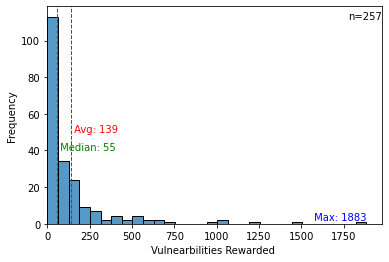

In [177]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Vulnearbilities Rewarded"])

plot_histogram(df, "Vulnearbilities Rewarded","",n)

153 rows were dropped.
111 rows remaining.


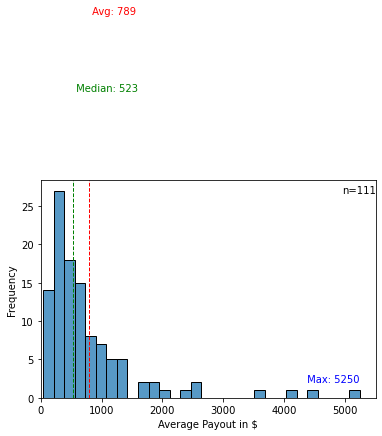

In [178]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Average Payout"])
plot_histogram(df, "Average Payout", "in $",n)

0 rows were dropped.
264 rows remaining.


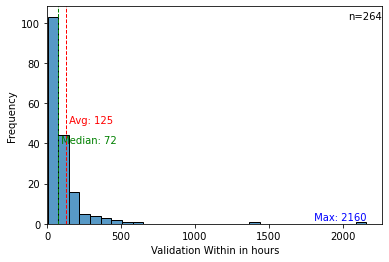

In [179]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Validation Within"])
plot_histogram(df, "Validation Within", "in hours",n)

47 rows were dropped.
217 rows remaining.


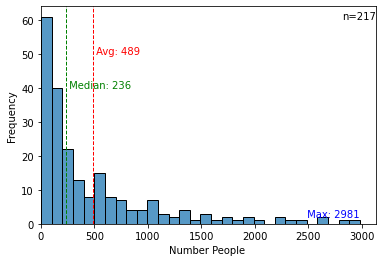

In [180]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Number People"])
plot_histogram(df, "Number People", "",n)

74 rows were dropped.
190 rows remaining.


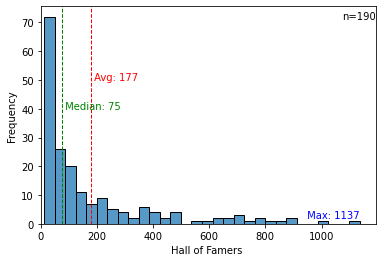

In [181]:

df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Hall of Famers"])
plot_histogram(df, "Hall of Famers", "",n)


### Safe habour

In [182]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
# Plot the counts using seaborn
df,n = drop_nan(df, df["Is Safe Harbor"])
counts = df["Is Safe Harbor"].value_counts()
count_n = counts.iloc[0] + counts.iloc[1]
dropped_columns = n - count_n




0 rows were dropped.
264 rows remaining.


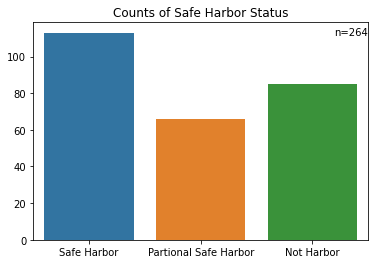

In [183]:
colors = [(0, 0, 1, 1), (0, 1, 0, 1), (1, 0, 0, 1)]
sns.barplot(x=["Safe Harbor", "Partional Safe Harbor", "Not Harbor"], y=[counts.iloc[0], counts.iloc[1], dropped_columns], data=df)
plt.title("Counts of Safe Harbor Status")
ax = plt.gca()
ax.text(1, 0.98, f"n={n}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/histogram_safe_habor.png",facecolor="white", edgecolor="none")

----------------

## Average payout plotting

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_82363/1731563499.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")


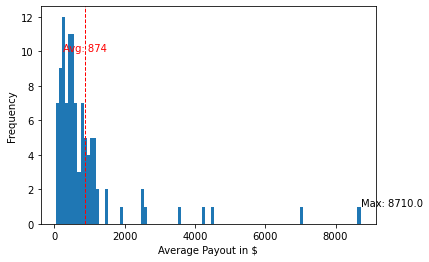

In [184]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

# remove the $ sign and the comma from the Average_payout column
df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")






# convert the Average_payout column to a numeric data type
df["Average_payout"] = pd.to_numeric(df["Average_payout"])
avg = df["Average_payout"].mean()

max_value = df["Average_payout"].max()
# create a histogram of the Average_payout column
df["Average_payout"].plot.hist(bins=100)

# label the x and y axes
plt.xlabel("Average Payout in $")
plt.ylabel("Frequency")

plt.text(max_value, 1, "Max: " + str(max_value))

plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
plt.text(avg, 10, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Average_payout.png")




## Num of white head hackers

Average number of hacks: 526


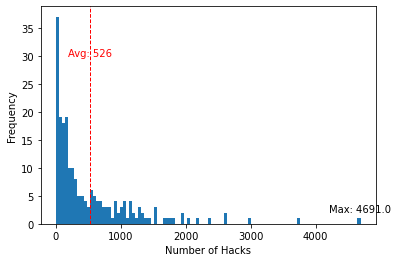

In [185]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")


avg = df["Num_Hacks"].mean()

# print the average
print("Average number of hacks:", int(avg))

# convert the Num_Hacks column to a numeric data type
df["Num_Hacks"] = pd.to_numeric(df["Num_Hacks"])

# create a histogram of the Num_Hacks column
df["Num_Hacks"].plot.hist(bins=100)

# add a vertical line at the location of the average
plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
max_value = df["Num_Hacks"].max()
plt.text(max_value, 2, "Max: " + str(max_value),ha="center")

plt.text(avg, 30, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Num_hacks.png")




## Reward Average


Total count of values in the reward element column 176
Average reward in $: 3242
[2525.0, 5100.0, 1800.0, 5050.0, 5025.0, 2350.0, 10250.0, 5150.0, 1275.0, 2500.0, 662.5, 662.5, 1575.0, 3135.0, 1325.0, 1825.0, 1325.0, 2312.5, 6100.0, 5050.0, 25050.0, 5075.0, 5125.0, 10100.0, 800.0, 3100.0, 1250.0, 3050.0, 3100.0, 525.0, 5075.0, 1000.0, 1550.0, 3400.0, 3400.0, 3750.0, 2250.0, 2250.0, 1250.0, 1250.0, 2250.0, 1250.0, 1550.0, 2600.0, 1600.0, 1300.0, 12600.0, 3400.0, 3050.0, 4600.0, 3575.0, 15150.0, 2075.0, 3600.0, 1825.0, 3050.0, 3025.0, 2000.0, 2000.0, 850.0, 800.0, 1750.0, 675.0, 2600.0, 1275.0, 12625.0, 2100.0, 1325.0, 1325.0, 1575.0, 1325.0, 1800.0, 2525.0, 1325.0, 800.0, 2575.0, 2350.0, 1325.0, 800.0, 2550.0, 4250.0, 12550.0, 50000.0, 6100.0, 4800.0, 1250.0, 1550.0, 3050.0, 3050.0, 3050.0, 800.0, 1550.0, 2550.0, 1525.0, 2050.0, 2350.0, 1375.0, 1850.0, 2575.0, 4075.0, 1325.0, 1275.0, 5025.0, 2625.0, 625.0, 2500.0, 2550.0, 800.0, 5050.0, 2350.0, 3050.0, 2275.0, 1600.0, 1625.0, 1325.0, 13

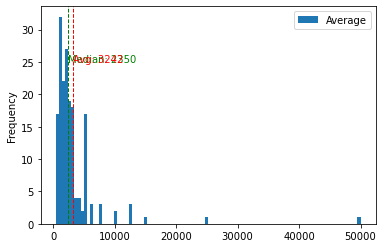

In [186]:
import csv 
import pandas as pd
# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  # Skip the header row
  next(reader)
  total_average = 0
  averages = []
  count = 0
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the reward value from the current row
    reward_range = row[1]

    if reward_range == "":continue
    #Split the reward range on the "-" character
    if "-" in reward_range:
  # Split the string on the "-" character
      count += 1
      lower, upper = reward_range.split("-")
    else:
      # Assign the entire string to the lower variable
      lower = reward_range
      upper = None

    
    # Remove the "$" and "," characters from the strings
    lower = lower.replace("$", "").replace(",", "")
    upper = upper.replace("$", "").replace(",", "") if upper else None

    if "Points" in lower:
      lower = 0

    # Convert the strings to integers

    try :
      lower = int(lower)
      upper = int(upper) if upper else None
    except ValueError:
      print("ValueError", lower, upper)

      continue

    # Calculate the average of the lower and upper bounds
    if upper:
      average = (lower + upper) / 2
      total_average += average
      averages.append(average)
    else:
      average = lower
      total_average += average
      averages.append(average)


  print("Total count of values in the reward element column",count)  
  print("Average reward in $:", int(total_average / count))
  print(averages)
  df = pd.DataFrame(averages, columns=["Average"])
  df.plot.hist(bins=100)
  df_average = df["Average"].mean()
  df_median= df["Average"].median()
  print("this is the median",df_median)
  plt.axvline(df_median, color="g", linestyle="dashed", linewidth=1)
  plt.axvline(df_average, color="r", linestyle="dashed", linewidth=1)
  plt.text(df_median, 25, "Median: " + str(int(df_median)), color="g")
  plt.text(df_average, 25, "Avg: " + str(int(df_average)), color="r")









## Safe Habour Plotted

Safe Harbor: 111
Partial Safe Harbor: 68
Not Safe Harbor: 86


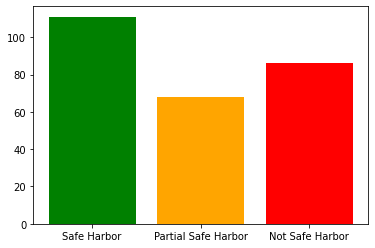

In [187]:
# Initialize lists to store the data
safe_harbor = []
partial_safe_harbor = []
not_safe_harbor = []

# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the "Is_Safe_harbor" value from the current row
    value = row[4]
    
    # Check the value and increment the appropriate list
    if value == "True":
      safe_harbor.append(1)
    elif "Partial safe harbor" in value:
      partial_safe_harbor.append(1)
    else:
      not_safe_harbor.append(1)

# Calculate the lengths of the lists
safe_harbor_count = len(safe_harbor)
print("Safe Harbor:", safe_harbor_count)
partial_safe_harbor_count = len(partial_safe_harbor)
print("Partial Safe Harbor:", partial_safe_harbor_count)
not_safe_harbor_count = len(not_safe_harbor)
print("Not Safe Harbor:", not_safe_harbor_count)

# Create the bar chart
plt.bar(["Safe Harbor", "Partial Safe Harbor", "Not Safe Harbor"], [safe_harbor_count, partial_safe_harbor_count, not_safe_harbor_count], color=["green", "orange", "red"])

# Show the chart
plt.show()


## Num hall of fame 

In [188]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/Bugcrowd_industry-asc_24.12.xlsx")

df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

df = df.str.replace("View the hall", "").str.replace("View all ", "")

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
median = int(df.median())
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
plt.axvline(median, color="g", linestyle="dashed", linewidth=1)
plt.text(median, 20, "Median: " + str(median),ha="left",color="g")
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")






NameError: name 'df_new' is not defined

In [ ]:
df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

for ele in df:
  if ele == "View the hall":
    df.replace(ele, 0, inplace=True)
    

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")




## Validation within 

In [ ]:
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

df = df["Validation_within"]
df.dropna(inplace=True)
df.str.replace('\n', '').str.replace('days', '')

df_final = pd.DataFrame()

for ele in df:
    if "$" in ele:
        ele = ele.replace(ele, "0")
        ele = ele.strip()
    if "days" in ele:
        ele = ele.replace("days", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "day" in ele:
        ele = ele.replace("day", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "about" in ele:
        ele = ele.replace("about", "")
        ele = ele.strip()
    if "month" in ele:
        ele = ele.replace("month", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24 * 30
        ele = str(ele) + " hours"
    if "minutes" in ele:
        ele = ele.replace("minutes", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 60
        ele = str(ele) + " hours"
    if "hours" in ele:
        ele = ele.replace("hours", "")
        ele = ele.strip()
    if "hour" in ele:
        ele = ele.replace("hour", "")
        ele = ele.strip()
    
    df_final = df_final.append({'Validation_within': ele}, ignore_index=True)

df_final = pd.to_numeric(df_final["Validation_within"])
df_final.plot.hist(bins=100)
average = df_final.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hours")
plt.ylabel("Frequency")
plt.text(average, 35, "Avg: " + str(average),ha="center",color="r")
    





# df['Validation_within'] = df['Validation_within'].str.replace('\n', '').str.replace('days', '')
# # Extract the numerical values from the entries
# df['Validation_within'] = df['Validation_within'].str.extract('(\d+)')

# # Convert the column to numeric type
# df['Validation_within'] = pd.to_numeric(df['Validation_within'])

# for element in df['Validation_within']:
#     print(element)


# df_new = pd.DateFrame("Validation_within" , columns=["Validation_within"])
# df.dropna(inplace=True)
# print(type(df))

## Scope Target Mobile

## Scope Target Android, IOS